# **Introduction**

The dataset allows for several new combinations of attributes and attribute exclusions or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.

1.   Use KNN to predict the number of hours of absenteeism.
2.   Use the perceptron first and SVM second to predict the social drinking status.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sn
import itertools
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/dmitriiannenkov/ml_hw_2/main/Absenteeism_at_work.csv'
df = pd.read_csv(url)
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,"239,554",97,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,"239,554",97,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,"239,554",97,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,"239,554",97,0,3,1,0,0,1,88,172,29,8


# **Exploratory Data Analysis (EDA)**

In [3]:
df.info()
# We need to fix "Work load" column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    int64 
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    int64 
 12  Education                        740

In [4]:
df.isna().sum()
# No NaNs detected

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [5]:
df = df.rename(columns={'Work load Average/day ': 'Work load Average/day'})

In [6]:
df['Work load Average/day']=df['Work load Average/day'].str.replace(',','.')
df['Work load Average/day'] = pd.to_numeric(df['Work load Average/day'])

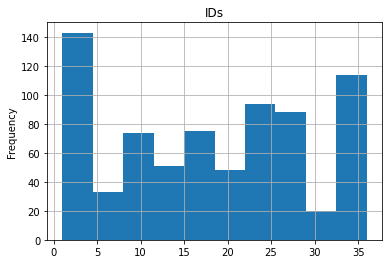

In [7]:
plt.title("IDs")
df['ID'].plot(kind='hist')
plt.grid()
plt.show()

In [8]:
df =df.drop(columns='ID')

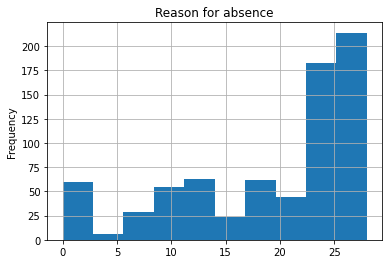

In [9]:
df['Reason for absence'].plot(kind='hist')
plt.title('Reason for absence')
plt.grid()
plt.show()

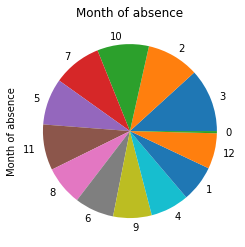

In [10]:
df['Month of absence'].value_counts().plot(kind='pie')
plt.title('Month of absence')
plt.grid()
plt.show()

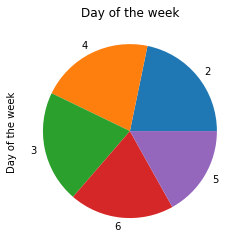

In [11]:
df['Day of the week'].value_counts().plot(kind='pie')
plt.title('Day of the week')
plt.grid()
plt.show()

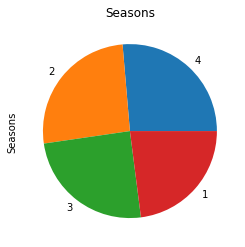

In [12]:
df['Seasons'].value_counts().plot(kind='pie')
plt.title('Seasons')
plt.grid()
plt.show()

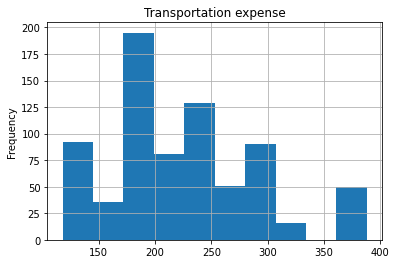

In [13]:
df['Transportation expense'].plot(kind='hist')
plt.title('Transportation expense')
plt.grid()
plt.show()

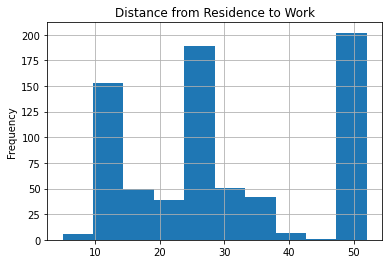

In [14]:
df['Distance from Residence to Work'].plot(kind='hist')
plt.title('Distance from Residence to Work')
plt.grid()
plt.show()

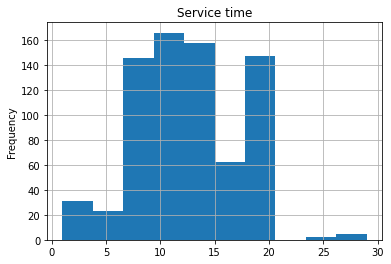

In [15]:
df[ 'Service time'].plot(kind='hist')
plt.title( 'Service time')
plt.grid()
plt.show()

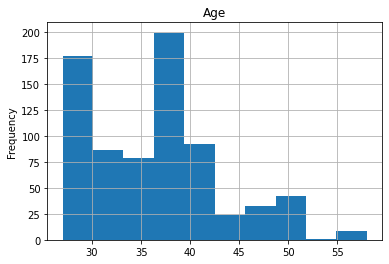

In [16]:
df['Age'].plot(kind='hist')
plt.title('Age')
plt.grid()
plt.show()

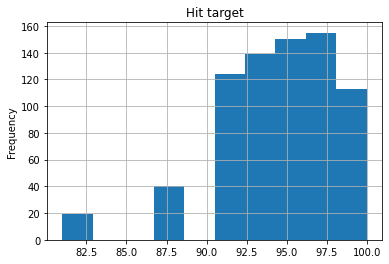

In [17]:
df['Hit target'].plot(kind='hist')
plt.title('Hit target')
plt.grid()
plt.show()

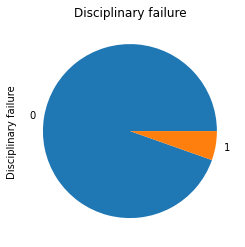

In [18]:
df['Disciplinary failure'].value_counts().plot(kind='pie')
plt.title('Disciplinary failure')
plt.grid()
plt.show()

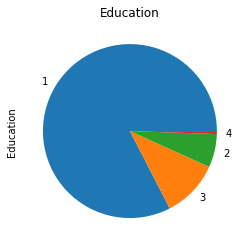

In [19]:
df['Education'].value_counts().plot(kind='pie')
plt.title('Education')
plt.grid()
plt.show()

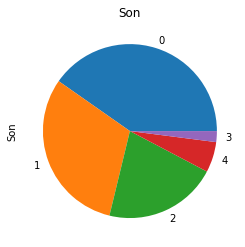

In [20]:
df['Son'].value_counts().plot(kind='pie')
plt.title('Son')
plt.grid()
plt.show()

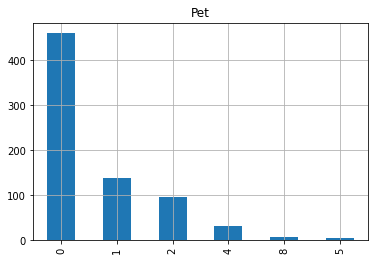

In [21]:
df['Pet'].value_counts().plot(kind='bar')
plt.title('Pet')
plt.grid()
plt.show()

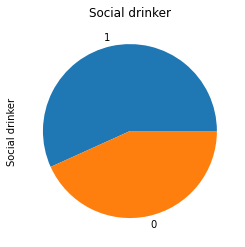

In [22]:
df['Social drinker'].value_counts().plot(kind='pie')
plt.title('Social drinker')
plt.grid()
plt.show()

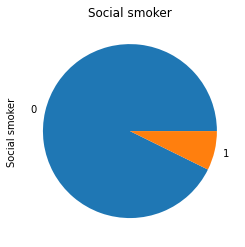

In [23]:
df['Social smoker'].value_counts().plot(kind='pie')
plt.title('Social smoker')
plt.grid()
plt.show()

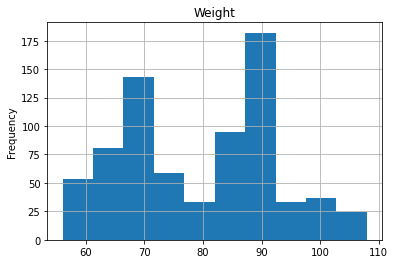

In [24]:
df['Weight'].plot(kind='hist')
plt.title('Weight')
plt.grid()
plt.show()

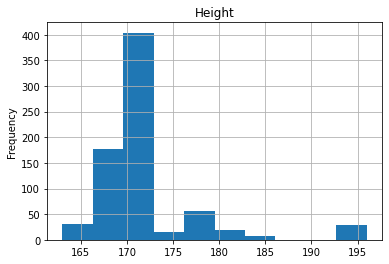

In [25]:
df['Height'].plot(kind='hist')
plt.title('Height')
plt.grid()
plt.show()

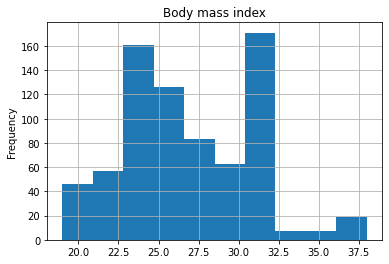

In [26]:
df['Body mass index'].plot(kind='hist')
plt.title('Body mass index')
plt.grid()
plt.show()

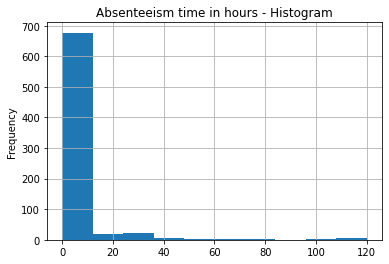

In [27]:
df['Absenteeism time in hours'].plot(kind='hist')
plt.title('Absenteeism time in hours - Histogram')
plt.grid()
plt.show()

In [28]:
df['Absenteeism time in hours'].describe(include='all')

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

In [29]:
continuous_attributes = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day', 'Transportation expense',
                         'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
                         
categorical_attributes = ['Reason for absence','Month of absence','Day of the week',
                          'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                          'Social smoker', 'Pet', 'Son']

In [30]:
df[continuous_attributes].skew().sort_values(ascending=True)

Hit target                        -1.261708
Service time                      -0.004720
Weight                             0.017001
Body mass index                    0.305046
Distance from Residence to Work    0.312083
Transportation expense             0.396189
Age                                0.697703
Work load Average/day              0.961457
Height                             2.566060
Absenteeism time in hours          5.720728
dtype: float64

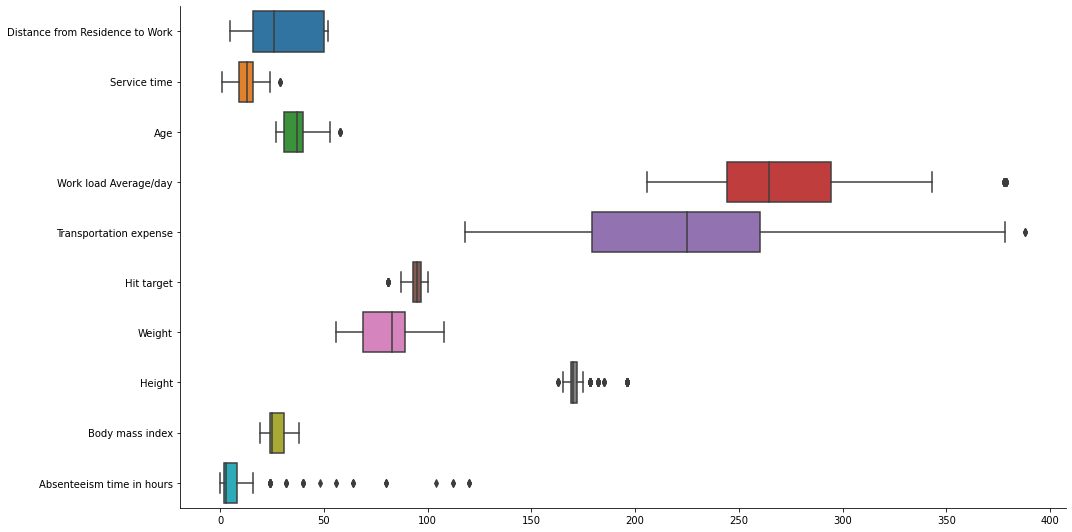

In [31]:
sns.catplot(kind='box', data=df[continuous_attributes], orient='h', height=7.5, aspect=2)

# **Choosing Optimal Number of Clusters**

Kmeans or hierarchical clustering ?

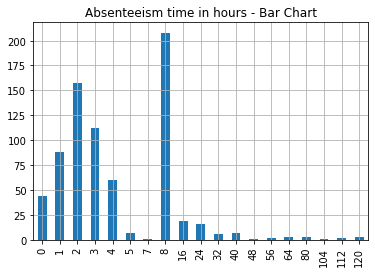

In [32]:
df['Absenteeism time in hours'].value_counts().sort_index().plot(kind='bar')
plt.title('Absenteeism time in hours - Bar Chart')
plt.grid()
plt.show()

In [33]:
print('%.2f' % (df[df['Absenteeism time in hours'] <= 8].shape[0]/df.shape[0]*100)) # 91% of our data are absences less that 10 hours

91.49


In [34]:
df['Absenteeism time in hours'].value_counts(sort=True, bins=4)

(-0.121, 30.0]    712
(30.0, 60.0]       16
(90.0, 120.0]       6
(60.0, 90.0]        6
Name: Absenteeism time in hours, dtype: int64

In [35]:
df['Absenteeism time in hours'].value_counts(sort=True, bins=[0, 3, 8, 32, 120])

(-0.001, 3.0]    401
(3.0, 8.0]       276
(8.0, 32.0]       41
(32.0, 120.0]     22
Name: Absenteeism time in hours, dtype: int64

We will breakdown the given data into 4 classes: [0, 2], [3, 8], [9, 32], [33, 120]  

In [36]:
criteria = [df['Absenteeism time in hours'].between(0, 3), 
            df['Absenteeism time in hours'].between(4, 8), 
            df['Absenteeism time in hours'].between(9, 32),
            df['Absenteeism time in hours'].between(33, 120)]
values = [1, 2, 3, 4]
df['Class'] = np.select(criteria, values, 8)
df_d = df

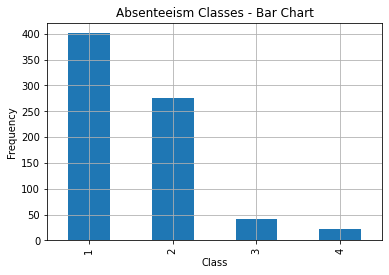

In [37]:
df['Class'].value_counts().sort_index().plot(kind='bar')
plt.title('Absenteeism Classes - Bar Chart')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# **Feature Selection**

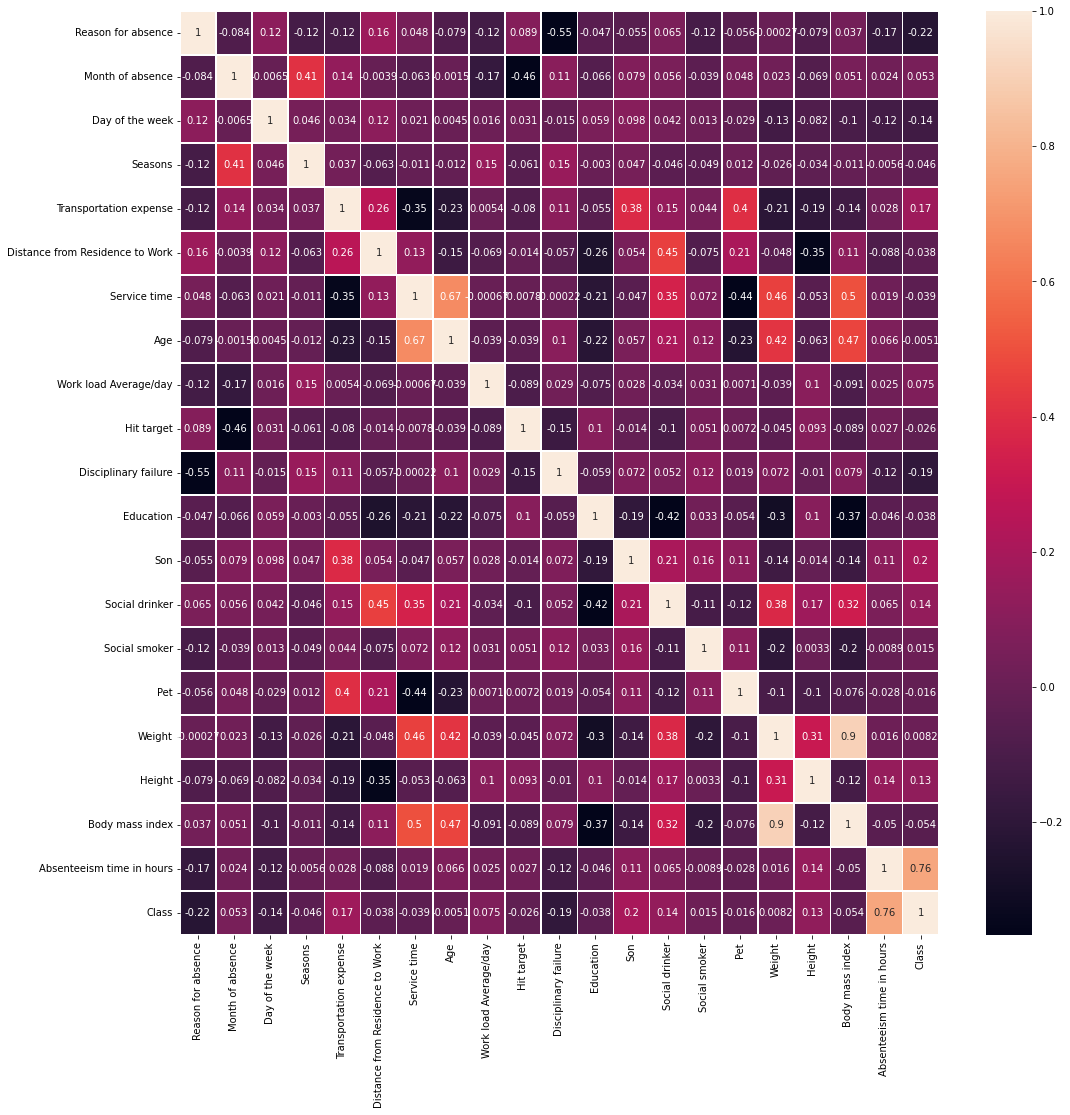

In [38]:
corrMatrix = pd.DataFrame(df_d.corr())

fig, ax = plt.subplots(figsize=(17,17)) # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True, linewidths=.5, robust=True, ax=ax)
plt.show()

Text(0.5, 1.0, 'Class')

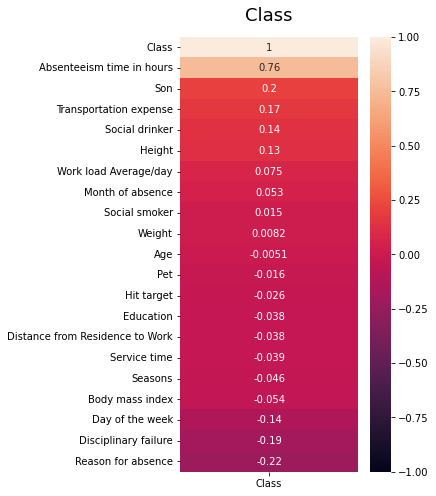

In [39]:
plt.figure(figsize=(4, 8))
heatmap = sn.heatmap(corrMatrix[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Class', fontdict={'fontsize':18}, pad=16)

In [40]:
absenteeism_corr = pd.DataFrame(corrMatrix.iloc[:, -1])
significant = absenteeism_corr[abs(absenteeism_corr) >= 0.05]
significant['Use'] = significant['Class'].notna()
significant_col = significant.index[significant['Use']].tolist()
significant_col.remove('Absenteeism time in hours')
significant_col.remove('Class')
significant_col.remove('Social drinker')
significant_col

['Reason for absence',
 'Month of absence',
 'Day of the week',
 'Transportation expense',
 'Work load Average/day',
 'Disciplinary failure',
 'Son',
 'Height',
 'Body mass index']

# **Data Scaling**

In [41]:
X = df_d[significant_col]
y = df_d['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [42]:
# Data Scaling using Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_scaled = scaler.fit_transform(X)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

# **KNN**

In [43]:
# Function to calculate the Error rate for a given type of KNN and a specific k-value
def error_rate(X_train, y_train, X_test,y_test, knn_type, i):
  knn = knn_type(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  return np.mean(pred_i != y_test)

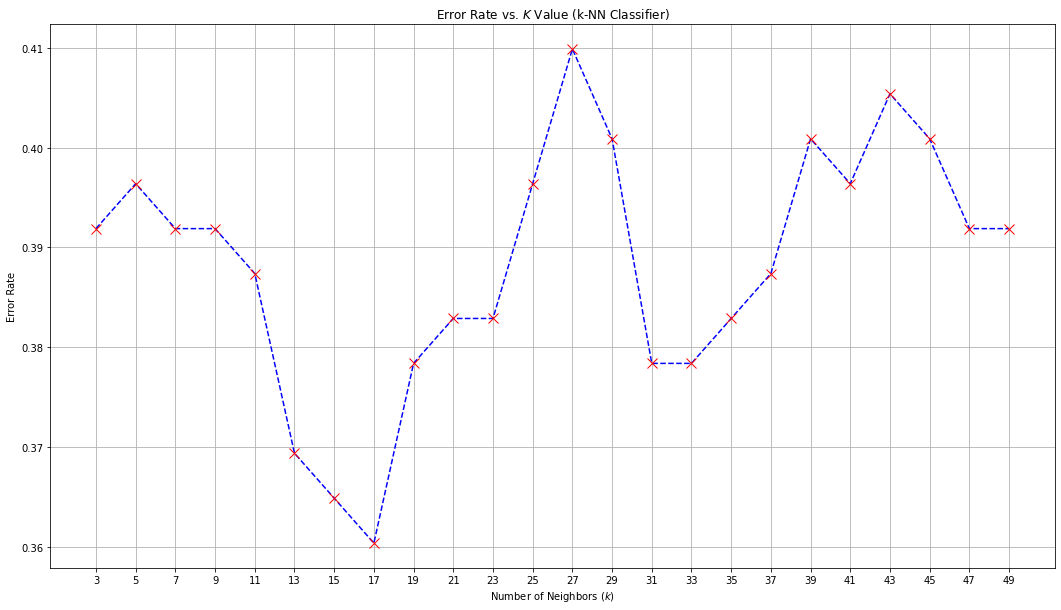

In [44]:
k_test = range(3,51,2) # Range of k values to be tested
error_rates = []

for i in k_test:
  error_rates.append(error_rate(X_train,y_train, X_test,y_test, KNeighborsClassifier, i))

# Plot
plt.figure(figsize=(18,10))
plt.plot(k_test,error_rates,color='blue', linestyle='dashed', marker='x', markeredgecolor='red', markersize=10)
plt.title('Error Rate vs. $K$ Value (k-NN Classifier)')
plt.xticks(k_test)
plt.xlabel('Number of Neighbors ($k$)')
plt.ylabel('Error Rate')
plt.grid()

We will use ***k = 17***, as it has on of the smallest errors as well as the highest accuracy. We will then see if overfitting will play part in this. 

In [45]:
knn = KNeighborsClassifier(n_neighbors = 17, metric='minkowski', p=2) # Using Euclidian Dist
knn.fit(X_train_scaled, y_train) 

#Checking performance on the training set
print('Accuracy of K-NN Classifier on training set: %.3f' % knn.score(X_train_scaled, y_train))
#Checking performance on the test set
print('Accuracy of K-NN Classifier on test set: %.3f' % knn.score(X_test_scaled, y_test))
print('Error rate of K-NN Classifier: %.3f' % error_rate(X_train_scaled,y_train, X_test_scaled, y_test, KNeighborsClassifier, 17))

Accuracy of K-NN Classifier on training set: 0.647
Accuracy of K-NN Classifier on test set: 0.631
Error rate of K-NN Classifier: 0.369


# **Perceptron First and SVM**

Use the perceptron first and SVM second to predict the social drinking status.

In [46]:
X = df.drop(columns=['Class', 'Social drinker'])
y = df_d['Social drinker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Perceptron First
prcptrn = Perceptron(tol=1e-3,random_state=0, shuffle=True, warm_start=True)
prcptrn.fit(X_train_scaled, y_train)
print('Accuracy of Perceptron on training set: %.3f' % prcptrn.score(X_train_scaled, y_train))
#Checking performance on the test set
print('Accuracy of Perceptron on test set: %.3f' % prcptrn.score(X_test_scaled, y_test))

Accuracy of Perceptron on training set: 0.847
Accuracy of Perceptron on test set: 0.860


In [49]:
# SVC
supp_vec_reg = SVC(gamma='auto',kernel='poly', C=1, random_state=0)
supp_vec_reg.fit(X_train_scaled, y_train)
print('Accuracy of SVR on training set: %.3f' % supp_vec_reg.score(X_train_scaled, y_train))
#Checking performance on the test set
print('Accuracy of SVR on test set: %.3f' % supp_vec_reg.score(X_test_scaled, y_test))

Accuracy of SVR on training set: 1.000
Accuracy of SVR on test set: 0.982
